In [2]:
import pandas
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")


alloc_order = ["ArrayAtomicF", "ArrayAtomicD", "ArrayLockedF", "ArrayLockedD",
               "ArrayAlignedF", "ArrayAlignedD", "TableF", "TableD"]


# Local Benchmarks

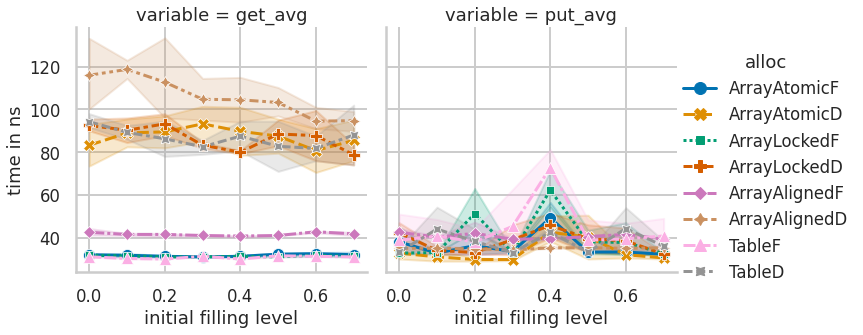

In [10]:
pgd = pandas.read_csv("out/filling.csv")
pgd["x"] *= 0.01
pgd = pgd[["x", "alloc", "get_avg", "put_avg"]
          ].melt(id_vars=["x", "alloc"], value_vars=["get_avg", "put_avg"], value_name="time")
g = sns.relplot(data=pgd, kind="line", x="x", y="time",
                col="variable", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
# g.set(ylim=(0, 300))
g.set(xlabel="initial filling level")
g.set(ylabel="time in ns")


# Server Benchmarks

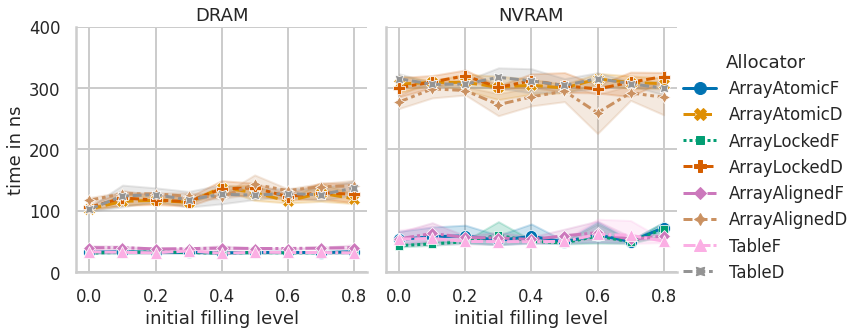

In [9]:
vd = pandas.read_csv("remote/filling_v.csv")
vd["mem"] = "DRAM"
pd = pandas.read_csv("remote/filling_p.csv")
pd["mem"] = "NVRAM"
pgd = pandas.concat([vd, pd], ignore_index=True)

pgd["level"] = pgd["x"] * 0.01

g = sns.relplot(data=pgd, kind="line", x="level", y="get_avg",
                col="mem", style="alloc", hue="alloc", markers=True,
                style_order=alloc_order, hue_order=alloc_order)
g.set_titles("{col_name}")
g.legend.set_title("Allocator")
g.set(xlabel="initial filling level")
g.set(ylabel="time in ns")
g.set(ylim=(0,400))
g.savefig("../../text/thesis/plot/filling.pdf")
